<IPython.core.display.Javascript object>


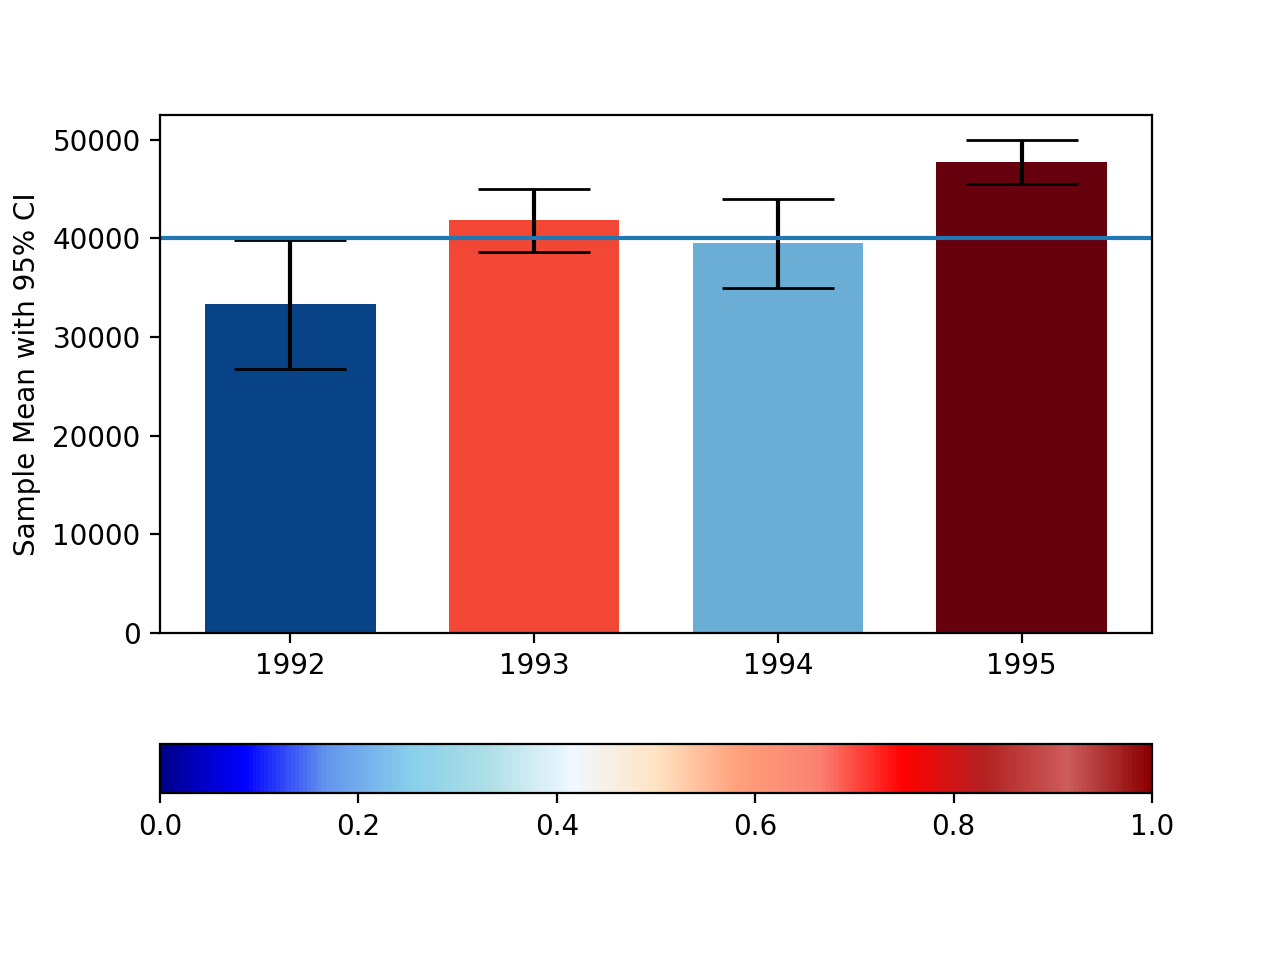

In [14]:
%matplotlib notebook 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.colors as mcol
import matplotlib.cm as cm


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

description = df.T.describe()
description.columns = description.columns.astype(str)

z_factor = 1.96
yerr = z_factor*(description.loc['std']/np.sqrt(description.loc['count']))

#colors = ['blue', 'white', 'red']
#cmap = mcol.LinearSegmentedColormap.from_list('mycmap',colors)

plt.figure()
im = plt.bar(description.columns,description.iloc[1].values, width=0.7, 
        yerr=yerr,capsize=20, color=color)
plt.axhline(y=y)
#plt.gca().set_hlinelabel('y = 38500')
#plt.gca().set_xlabel('Year')
plt.ylabel("Sample Mean with 95% CI")
plt.colorbar(s_m,orientation='horizontal')




In [5]:
nearest = 100 
y = 40000 
mean = description.iloc[1]
color_df = pd.DataFrame()
color_df['Difference'] = (nearest*(y - mean)//nearest)

# find the sign of the difference 
color_df['Sign'] = color_df['Difference'].abs()/color_df['Difference']
old_range = color_df['Difference'].abs().min(), color_df['Difference'].abs().max()
new_range = .5,1

# multiply it by the remapped values
color_df['Shade'] = color_df['Sign']*np.interp(color_df['Difference'].abs(), old_range, new_range)
color_df['Select Color'] = color_df['Shade'].apply(lambda x: 'white' if x==0 else
                                                  'use blues cmap to get color' if x > 0 else
                                                  'use reds cmap to get color')

color_df

,Difference,Sign,Shade,Select Color
1992,6687.0,1.0,0.926983,use blues cmap to get color
1993,-1862.0,-1.0,-0.593672,use reds cmap to get color
1994,506.0,1.0,0.500000,use blues cmap to get color
1995,-7744.0,-1.0,-1.000000,use reds cmap to get color


In [4]:
values = np.array(description.iloc[1])
y = 40000
shade = [0.926983 , -0.593672 , 0.5 , -1.0]
blues = cm.Blues
reds = cm.Reds
color = ['white' if x==0 else reds(abs(x)) if x < 0 else blues(abs(x)) for x in shade]


color_spectrum = ['darkblue','blue','cornflowerblue',
                  'skyblue','powderblue','aliceblue',
                  'bisque','lightsalmon',
                  'salmon','red','firebrick','indianred',
                  'darkred',]

# Create a colormap 
cmap = mcol.LinearSegmentedColormap.from_list('CustomCmap', color_spectrum)
s_m = cm.ScalarMappable(cmap=cmap)
s_m.set_array([])
